In [1]:
# импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error

sns.set_style("darkgrid")

%matplotlib inline

# Разведочный анализ данных

In [2]:
# загружаем датасет
df = pd.read_csv(
    'Период отчета_01.01.2018_31.12.2022_раздел.csv',
    index_col = [0], # преобразуем столбец с датой в индекс
    parse_dates = [0], # преобразуем дату в формат datetime
    dayfirst = True) # уточняем, что день идет первым

In [3]:
# копируем датасет и выводим первые пять строк
df_sales = df.copy()
print(df_sales.shape)
df_sales.head()

(4102457, 8)


,Shop,Nomenclature_group,Nomenclature,Quantity_sold,Cost_price,Revenue,Profit,Profit_percent
Date,,,,,,,,
2018-01-02,(закрыт) ЭНЕРГЕТИКОВ,Арматура для унитаза,"Механизм впускной 1/2 боковой ALCAPLAST А-15,",1,251,452,201,79.78
2018-01-02,(закрыт) ЭНЕРГЕТИКОВ,"Канализация, сифоны, гофры",Клапан Bonomini обратный для стиральной машины...,1,146,224,78,53.30
2018-01-02,(закрыт) ЭНЕРГЕТИКОВ,Смесители,Смеситель для ванны MOFEM Треф 603 TREFF CER ...,1,3605,5488,1883,52.25
2018-01-02,БАЙКОНУРСКАЯ,Арматура для унитаза,"Механизм впускной 1/2 нижний ALCAPLAST А-17 , ...",1,290,534,244,84.27
2018-01-02,БАЙКОНУРСКАЯ,Воздухоотводчики,"Кран воздушный КВ-1, 3/4""",4,119,252,133,111.71


In [9]:
# смотрим пропуски
df_sales.isna().sum()

Shop                  11
Nomenclature_group     3
Nomenclature           0
Quantity_sold          0
Cost_price             0
Revenue                0
Profit                 0
Profit_percent         0
dtype: int64

In [5]:
# выводим описательную статитстику
df_sales.describe()

,Quantity_sold,Cost_price,Revenue,Profit,Profit_percent
count,4.102457e+06,4.102457e+06,4.102457e+06,4.102457e+06,4.102457e+06
mean,4.054585e+00,6.475682e+02,9.200173e+02,2.724711e+02,1.558719e+02
std,1.749061e+01,2.591071e+03,4.266126e+03,2.423863e+03,1.173645e+04
min,-1.500000e+03,-2.038840e+05,-6.529940e+05,-6.529940e+05,-1.932130e+03
25%,1.000000e+00,5.900000e+01,1.040000e+02,4.200000e+01,5.674000e+01
50%,2.000000e+00,1.700000e+02,2.920000e+02,1.170000e+02,7.065000e+01
75%,4.000000e+00,4.710000e+02,7.950000e+02,3.150000e+02,8.667000e+01
max,1.200000e+04,1.168608e+06,1.579200e+06,4.127990e+05,4.999900e+06


In [12]:
# топ продаж по номенклатуре
#df_sales['Nomenclature'].value_counts().head(10)

Услуги по оформлению документов,                        35505
Пакет п/э (40*60),                                      32742
Ниппель , Диаметр: 1/2                                  26057
Отвод Ostendorf, 50мм х 45°                             21992
Отвод Ostendorf, 50мм х 87°                             21612
Труба металлопластиковая HENCO Стандарт, Диаметр: 16    21555
Труба фановая Ostendorf, 50мм х 500мм                   19788
Гофра Jimten A-103, Диаметр: 1-1/2, Размер: 50          19308
Труба фановая Ostendorf, 50мм х 1000мм                  17844
Труба металлопластиковая HENCO Стандарт, Диаметр: 20    16459
Name: Nomenclature, dtype: int64

In [13]:
# топ продаж по магазинам
#df_sales['Shop'].value_counts().head(10)

ГАГАРИНА              315729
ВЫБОРГСКОЕ ШОССЕ      288133
В О 15 линия, д.72    285925
ЛЕНИНА                237012
ВСЕВОЛОЖСК            236860
ПУШКИН                210113
ОБУХОВСКОЙ_ОБОРОНЫ    208536
РАЗЪЕЗЖАЯ             207698
РУДНЕВА               195030
ЛАНСКОЕ               190185
Name: Shop, dtype: int64

In [35]:
# берем продажи одной товарной позиции и(или) магазина

#df_sales = df_sales.loc[df_sales['Shop'] == 'ГАГАРИНА']
#df_sales = df_sales.loc[df_sales['Nomenclature'] == 'Отвод Ostendorf, 50мм х 45°']
#print(df_sales.shape)
#df_sales.head()

In [4]:
# изменяем шаг временного ряда, берем сумму (sum) или среднее (mean) за неделю

df_sales = df_sales[['Profit']].resample('W').sum()
print(df_sales.shape)
df_sales.head()

(261, 1)


,Profit
Date,
2018-01-07,805551
2018-01-14,1997174
2018-01-21,2566781
2018-01-28,2894793
2018-02-04,3019153


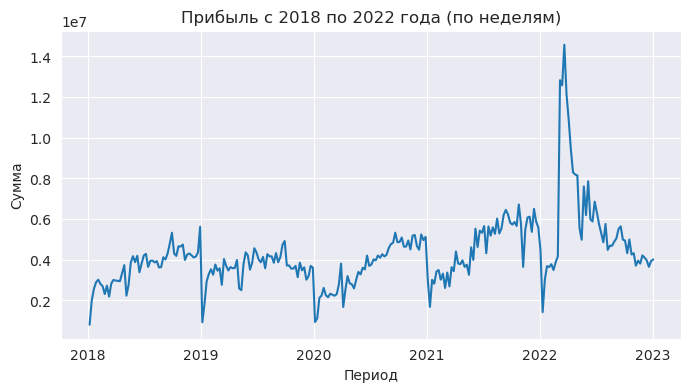

In [5]:
# строим график временного ряда
plt.figure(figsize=(8,4))
plt.plot(df_sales)
plt.title('Прибыль с 2018 по 2022 года (по неделям)')
plt.xlabel('Период')
plt.ylabel('Сумма')
plt.show()

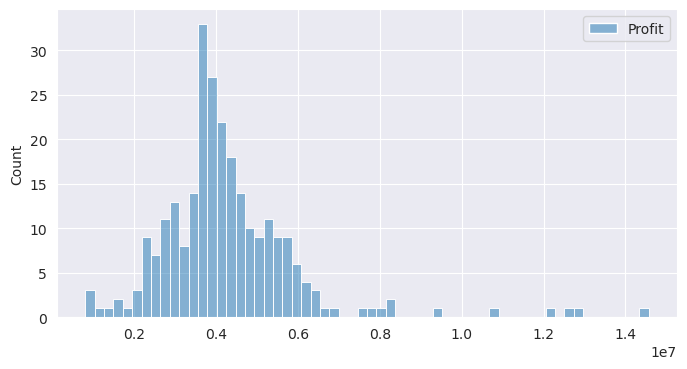

In [6]:
# строим гистограмму 
plt.figure(figsize=(8,4))
sns.histplot(df_sales, bins = 60)
plt.show()

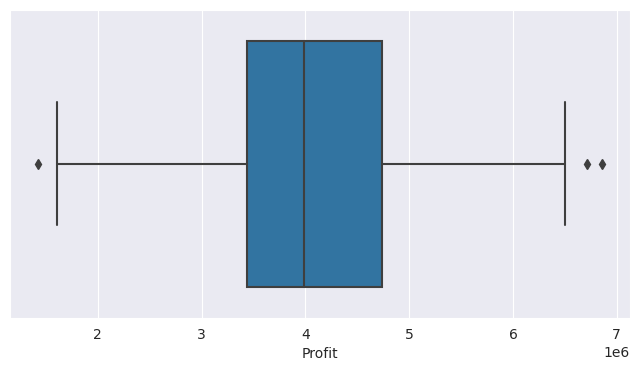

In [16]:
# строим boxplot 
plt.figure(figsize=(8,4))
sns.boxplot(x = df_sales.Profit)
plt.show()

In [15]:
# заменяем выбросы средним значением по неделям

Q1 = df_sales['Profit'].quantile(0.25)
Q3 = df_sales['Profit'].quantile(0.75)
IQR = Q3 - Q1
df_Q1 = np.array(df_sales[(df_sales['Profit'] < Q1-1.5*IQR )])
df_Q3 = np.array(df_sales[(df_sales['Profit'] > Q3+1.5*IQR )])

df_2018 = df_sales['2018':'2018']['Profit']
df_2019 = df_sales['2019':'2019']['Profit']
df_2020 = df_sales['2020':'2020']['Profit']
df_2021 = df_sales['2021':'2021']['Profit']
df_2022 = df_sales['2022':'2022']['Profit']

for i in range(len(df_sales)):
    if (df_sales.values[i] == df_Q1).any() or (df_sales.values[i] == df_Q3).any():
        index = (df_sales.index[i])
        df_list = [df_2018[(df_sales.index[i].week)-1],
                   df_2019[(df_sales.index[i].week)-1],
                   df_2020[(df_sales.index[i].week)-1],
                   df_2021[(df_sales.index[i].week)-1],
                   df_2022[(df_sales.index[i].week)-1]]

        df_sales[index:index] = np.mean(df_list) 

# LinearRegression

In [17]:
def prepareData(data, lag_start=1, lag_end=4, test_size=0.1):

    data = pd.DataFrame(data.copy())
    data.columns = ["y"]

    # считаем индекс в датафрейме, после которого начинается тестовыый отрезок
    test_index = int(len(data)*(1-test_size))

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)

    y = data.dropna().y
    X = data.dropna().drop(['y'], axis=1)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]

    return X_train, X_test, y_train, y_test

In [18]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = prepareData(df_sales, lag_start=1, lag_end=4, test_size=0.1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

df_lr_pred = pd.DataFrame(data=y_test)
df_lr_pred['prediction'] = lr_pred
print(df_lr_pred.shape)
df_lr_pred.sample(5).round()

(234, 3) (24, 3) (234,) (24,)
(24, 2)


,y,prediction
Date,,
2022-07-31,5757894.0,4928597.0
2022-07-24,4858085.0,5327003.0
2022-11-20,3809051.0,3990536.0
2022-09-04,5048385.0,4718392.0
2022-09-18,5641971.0,5153019.0


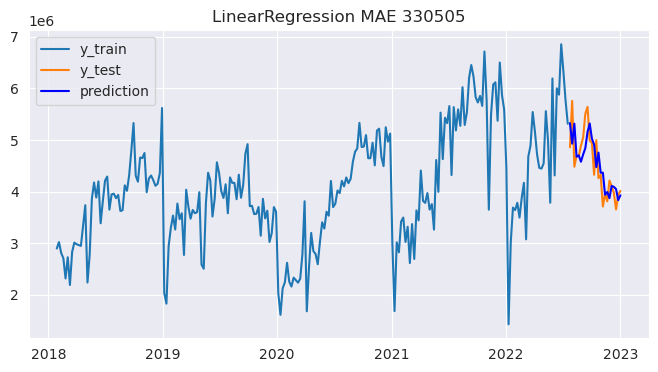

In [19]:
plt.figure(figsize=(8,4))
plt.plot(y_train, label='y_train')
plt.plot(df_lr_pred['y'], label='y_test')
plt.plot(df_lr_pred['prediction'], color='b', label='prediction')
    
error_lr = mean_absolute_error(df_lr_pred['prediction'], df_lr_pred['y'])
plt.title("LinearRegression MAE {0:.0f}".format(error_lr))
plt.legend(loc="best")
plt.show()

# RandomForestRegressor

In [20]:
from sklearn.ensemble import RandomForestRegressor

base_rf = RandomForestRegressor(max_depth=3, random_state=42)
base_rf.fit(X_train, y_train)

pred_rf = base_rf.predict(X_test)

In [21]:
df_rf = pd.DataFrame(data=y_test)
df_rf['prediction'] = pred_rf
df_rf.sample(5).round()

,y,prediction
Date,,
2022-09-25,4989708.0,5127914.0
2022-08-21,4685013.0,5056125.0
2022-11-20,3809051.0,3917919.0
2022-09-11,5510110.0,4717115.0
2023-01-01,4012988.0,3902156.0


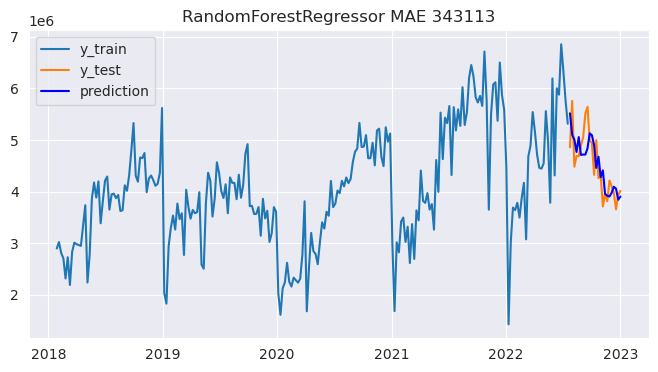

In [22]:
plt.figure(figsize=(8,4))
plt.plot(y_train, label='y_train')
plt.plot(df_rf['y'], label='y_test')
plt.plot(df_rf['prediction'], color='b', label='prediction')
    
error_rf = mean_absolute_error(df_rf['prediction'], df_rf['y'])
plt.title("RandomForestRegressor MAE {0:.0f}".format(error_rf))
plt.legend(loc="best")
plt.show()

In [23]:
from pprint import pprint
print('Параметры по умолчанию:\n')
pprint(base_rf.get_params())

Параметры по умолчанию:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [21]:
from sklearn.model_selection import GridSearchCV
# создаем сетку параметров
param_grid = { 
    'bootstrap': [True, False],
    'max_depth': [2, 4, 6, 8, 10], 
    'max_features': [1, 2, 3], 
    'min_samples_leaf' : [1, 2, 3], 
    'min_samples_split': [2, 4, 6], 
    'n_estimators': [100, 200, 300] 
}
# создаем модель
rf = RandomForestRegressor()
# создание модели поиска по сетке 
grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid,
                           cv = 3,
                           n_jobs=-1
                          )

In [22]:
# сопоставим поиск по сетке с данными 
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [23]:
best_grid = grid_search.best_estimator_
best_grid_pred = best_grid.predict(X_test)

df_rf_grid = pd.DataFrame(data=y_test)
df_rf_grid['prediction'] = best_grid_pred
df_rf_grid.tail().round()

,y,prediction
Date,,
2022-12-04,4103560.0,3914387.0
2022-12-11,3973320.0,3969447.0
2022-12-18,3652897.0,3930984.0
2022-12-25,3933966.0,3748226.0
2023-01-01,4012988.0,3856538.0


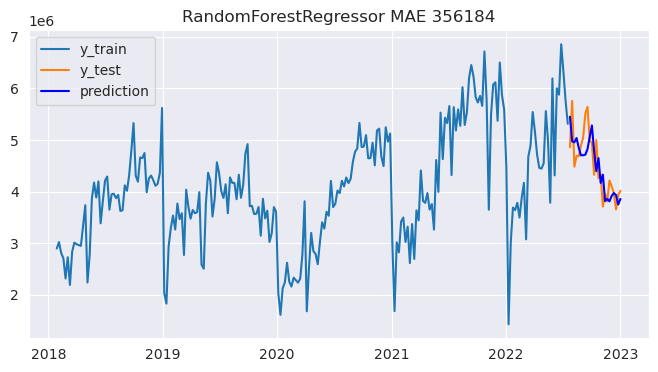

In [24]:
plt.figure(figsize=(8,4))
plt.plot(y_train, label='y_train')
plt.plot(df_rf_grid['y'], label='y_test')
plt.plot(df_rf_grid['prediction'], color='b', label='prediction')
    
error_rf = mean_absolute_error(df_rf_grid['prediction'], df_rf_grid['y'])
plt.title("RandomForestRegressor MAE {0:.0f}".format(error_rf))
plt.legend(loc="best")
plt.show()

# XGBoost

In [24]:
import xgboost as xgb

# исходные данные
X_train, X_test, y_train, y_test = prepareData(df_sales, lag_start=1, lag_end=4, test_size=0.1)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# задаём параметры
params = {
        'objective': 'reg:squarederror',
        'booster':'gblinear'
         }

trees = 1000

# прогоняем на кросс-валидации с метрикой rmse
cv = xgb.cv(params, dtrain, metrics = ('rmse'), verbose_eval=False, nfold=10, show_stdv=False, num_boost_round=trees)

# обучаем xgboost с оптимальным числом деревьев, подобранным на кросс-валидации
bst = xgb.train(params, dtrain, num_boost_round=cv['test-rmse-mean'].argmin())

# запоминаем ошибку на кросс-валидации
deviation = cv.loc[cv['test-rmse-mean'].argmin()]["test-rmse-mean"]

In [25]:
prediction_test = bst.predict(dtest)

df_xgb = pd.DataFrame(data=y_test)
df_xgb['prediction'] = prediction_test
df_xgb.sample(5).round()

,y,prediction
Date,,
2022-09-04,5048385.0,4698217.0
2022-07-24,4858085.0,5362030.0
2022-10-23,4258251.0,4704202.0
2022-11-13,3957250.0,3989071.0
2022-08-21,4685013.0,4699517.0


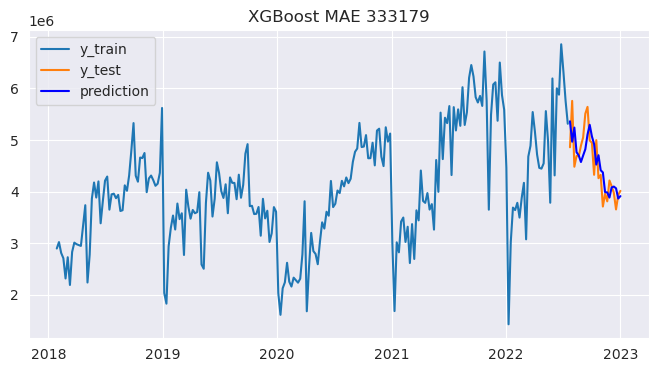

In [26]:
plt.figure(figsize=(8, 4))
plt.plot(y_train, label='y_train')
plt.plot(df_xgb['y'], label='y_test')
plt.plot(df_xgb['prediction'], color='b', label='prediction')

error_xgb = mean_absolute_error(df_xgb['prediction'], df_xgb['y'])
plt.title("XGBoost MAE {0:.0f}".format(error_xgb))
plt.legend(loc="best")
plt.show()

In [27]:
print("LinearRegression MAE {0:.0f}\n".format(error_lr))
print("RandomForestRegressor MAE {0:.0f}\n".format(error_rf))
print("XGBoost MAE {0:.0f}".format(error_xgb))

LinearRegression MAE 330505

RandomForestRegressor MAE 343113

XGBoost MAE 333179


# Нейронная сеть

In [28]:
import tensorflow as tf

tf.random.set_seed(42)

2023-04-29 21:33:39.662315: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        # Изменить форму данных с (history_size,) на (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)

In [30]:
def create_time_steps(length):
    return list(range(-length, 0))

In [31]:
def show_plot(plot_data, delta, title):
    labels = ['История', 'Реальное будущее значение', 'Прогноз']
    marker = ['o-', 'o', 'rx']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
      future = delta
    else:
      future = 0
  
    plt.figure(figsize=(8,4))
    plt.title(title)
    for i, x in enumerate(plot_data):
      if i:
        plt.plot(future, plot_data[i], marker[i], markersize=7,
                 label=labels[i])
      else:
        plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Временной интервал')
    return plt.show()

In [32]:
def plot_loss(history):
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], '.--', label='loss')
    plt.plot(history.history['val_loss'], 'o-', label='val_loss')
    plt.xlabel('Эпоха')
    plt.ylabel('MAE')
    plt.legend()
    plt.show()

In [33]:
# добавляем лаги исходного ряда в качестве признаков
data = df_sales.copy()
data.columns = ["y"]
    
for i in range(1, 4):
    data["lag_{}".format(i)] = data.y.shift(i)

data = data.dropna()
print(data.shape)
data.head()

(258, 4)


,y,lag_1,lag_2,lag_3
Date,,,,
2018-01-28,2894793.0,2566781.0,1997174.0,2029539.4
2018-02-04,3019153.0,2894793.0,2566781.0,1997174.0
2018-02-11,2808985.0,3019153.0,2894793.0,2566781.0
2018-02-18,2706368.0,2808985.0,3019153.0,2894793.0
2018-02-25,2313516.0,2706368.0,2808985.0,3019153.0


In [34]:
uni_data = data[['y']]
print(uni_data.shape)
uni_data.head()

(258, 1)


,y
Date,
2018-01-28,2894793.0
2018-02-04,3019153.0
2018-02-11,2808985.0
2018-02-18,2706368.0
2018-02-25,2313516.0


In [35]:
uni_data = uni_data.values
print(uni_data.shape)
uni_data[:5]

(258, 1)


array([[2894793.],
       [3019153.],
       [2808985.],
       [2706368.],
       [2313516.]])

In [36]:
#from sklearn.preprocessing import MinMaxScaler

#mm = MinMaxScaler()
#uni_data = mm.fit_transform(uni_data)
#print(uni_data.shape)
#uni_data[:5]

In [37]:
n = len(uni_data)

uni_train_mean = uni_data[:int(n*0.8)].mean()
uni_train_std = uni_data[:int(n*0.8)].std()

uni_data = (uni_data - uni_train_mean) / uni_train_std

print(uni_data.shape)
uni_data[:5]

(258, 1)


array([[-0.99615487],
       [-0.87883655],
       [-1.07710413],
       [-1.17391061],
       [-1.54451801]])

In [38]:
print('min' ,uni_data.min())
print('max', uni_data.max())

min -2.38252797215622
max 2.74057226980606


In [39]:
#n = len(uni_data)

#uni_data = (uni_data * uni_train_std) + uni_train_mean

#print(uni_data.shape)
#uni_data[:5]

In [40]:
n = len(uni_data)

univariate_past_history = 28
univariate_future_target = 0

x_train, y_train = univariate_data(uni_data, 0, int(n*0.8),
                                           univariate_past_history,
                                           univariate_future_target
                                  )

x_val, y_val = univariate_data(uni_data, int(n*0.8), None,
                                       univariate_past_history,
                                       univariate_future_target
                              )

x_train.shape, y_train.shape, x_val.shape, y_val.shape

((178, 28, 1), (178, 1), (24, 28, 1), (24, 1))

In [41]:
print ('История:\n')
print (x_train[0])
print ('\nЦель для прогнозирования:\n')
print (y_train[0])

История:

[[-0.99615487]
 [-0.87883655]
 [-1.07710413]
 [-1.17391061]
 [-1.54451801]
 [-1.15580061]
 [-1.66342969]
 [-1.05921205]
 [-0.88878446]
 [-0.91718575]
 [-0.93365239]
 [-0.9491332 ]
 [-0.5681647 ]
 [-0.20386471]
 [-1.61847214]
 [-1.10972232]
 [-0.08346816]
 [ 0.21128233]
 [-0.06373272]
 [ 0.23153096]
 [-0.53479935]
 [-0.13029737]
 [ 0.24503351]
 [ 0.3204961 ]
 [-0.28485926]
 [-0.00528582]
 [ 0.00727336]
 [-0.0751089 ]]

Цель для прогнозирования:

[-0.01578371]


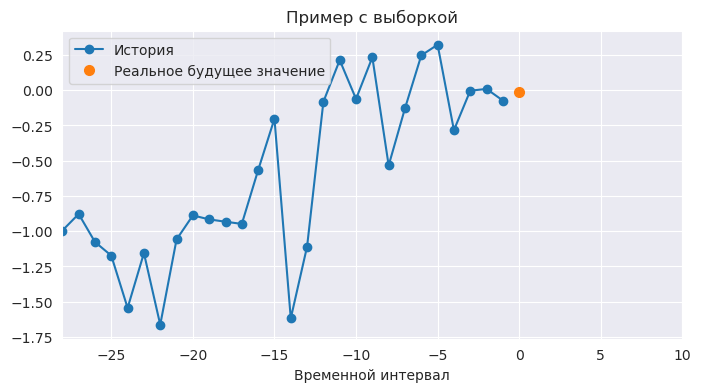

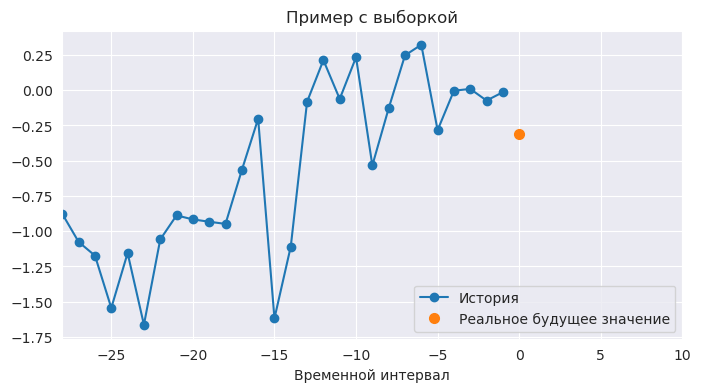

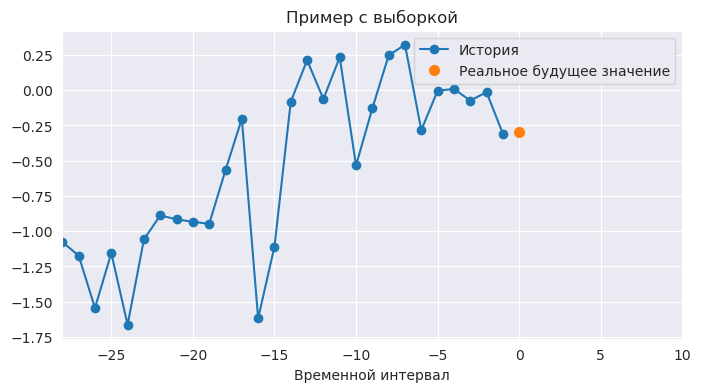

In [42]:
for col in range(3):
    show_plot(
              [x_train[col],
               y_train[col]],
               0,
               'Пример с выборкой'
               )
plt.show()

In [43]:
simple_lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32,
                         activation='relu', 
                         input_shape=x_train.shape[-2:]
                        ),
    
    tf.keras.layers.Dense(1)
])

simple_lstm.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss='mean_absolute_error')
simple_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


2023-04-29 21:34:00.290730: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-29 21:34:00.291639: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [44]:
history = simple_lstm.fit(x_train, 
                          y_train, 
                          epochs=16, 
                          validation_data=(x_val, y_val)
                         )

Epoch 1/16
6/6 [==============================] - 2s 107ms/step - loss: 0.6574 - val_loss: 0.6044
Epoch 2/16
6/6 [==============================] - 0s 63ms/step - loss: 0.5456 - val_loss: 0.3185
Epoch 3/16
6/6 [==============================] - 0s 92ms/step - loss: 0.4668 - val_loss: 0.3304
Epoch 4/16
6/6 [==============================] - 0s 50ms/step - loss: 0.4141 - val_loss: 0.4085
Epoch 5/16
6/6 [==============================] - 0s 74ms/step - loss: 0.4170 - val_loss: 0.3513
Epoch 6/16
6/6 [==============================] - 0s 40ms/step - loss: 0.4089 - val_loss: 0.3198
Epoch 7/16
6/6 [==============================] - 0s 60ms/step - loss: 0.4109 - val_loss: 0.3288
Epoch 8/16
6/6 [==============================] - 0s 66ms/step - loss: 0.4094 - val_loss: 0.3412
Epoch 9/16
6/6 [==============================] - 0s 52ms/step - loss: 0.4081 - val_loss: 0.3359
Epoch 10/16
6/6 [==============================] - 0s 38ms/step - loss: 0.3991 - val_loss: 0.3486
Epoch 11/16
6/6 [===========

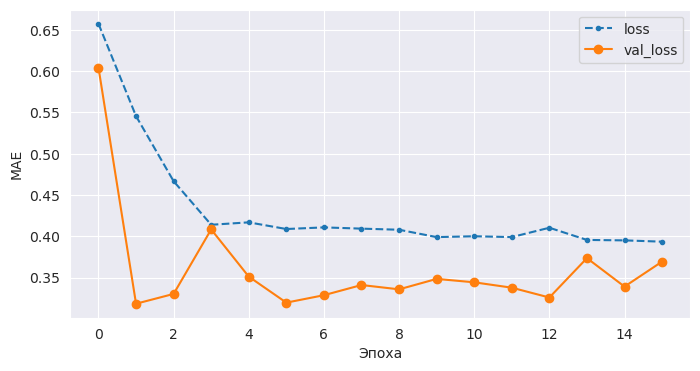

In [45]:
plot_loss(history)

In [46]:
y_pred_basic = simple_lstm.predict(x_val)

y_pred_basic_invers = (y_pred_basic * uni_train_std) + uni_train_mean
y_val_invers = (y_val * uni_train_std) + uni_train_mean
print('MAE', (mean_absolute_error(y_val_invers, y_pred_basic_invers)).round())

1/1 [==============================] - 0s 225ms/step
MAE 391693.0


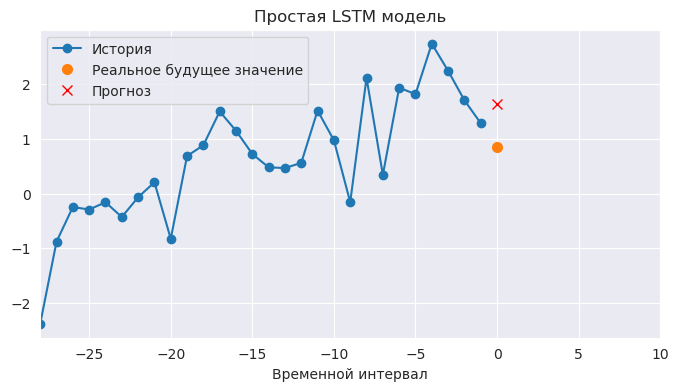

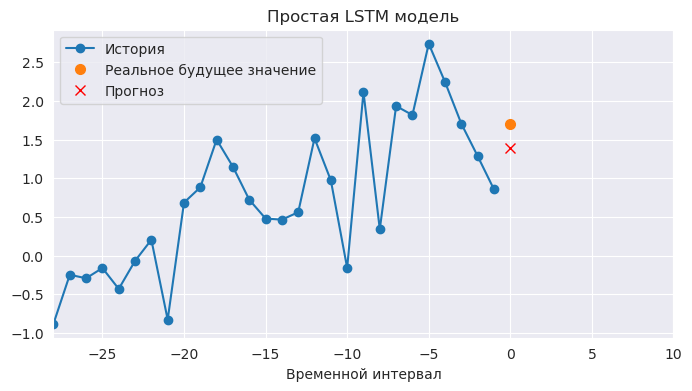

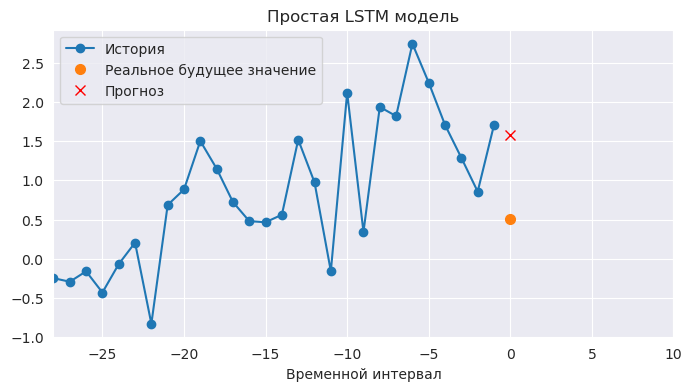

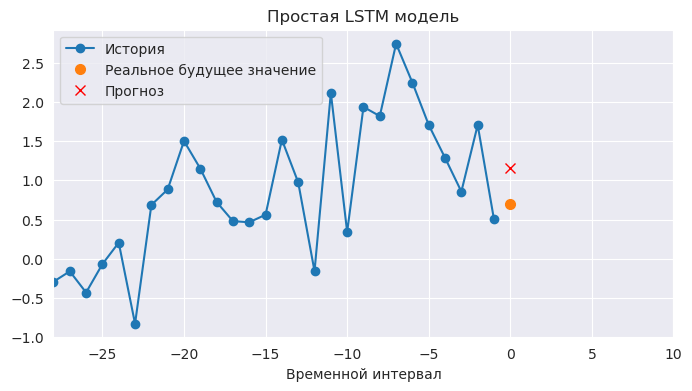

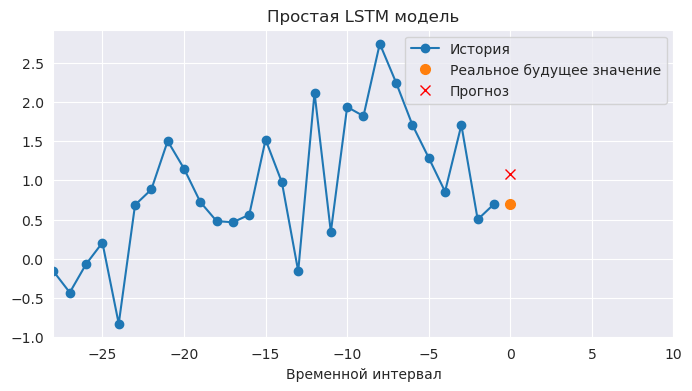

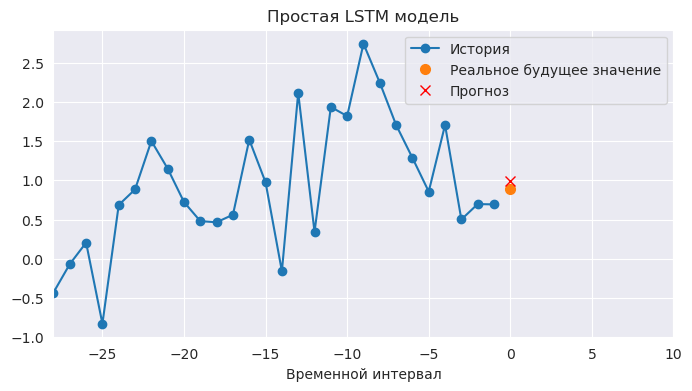

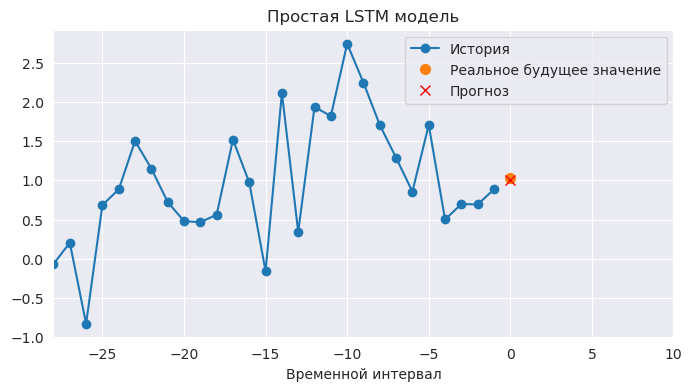

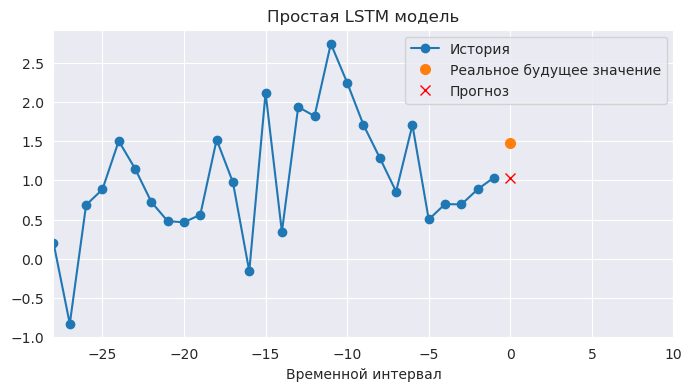

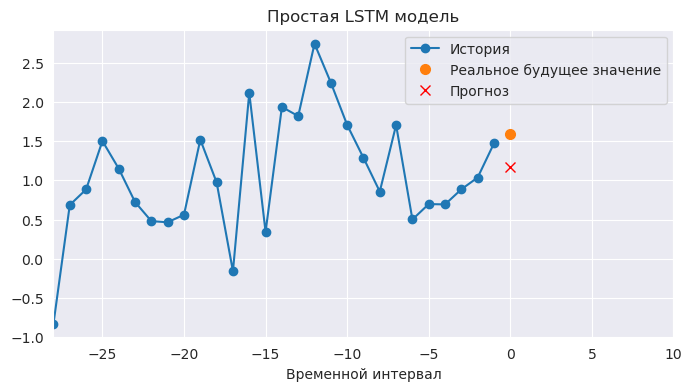

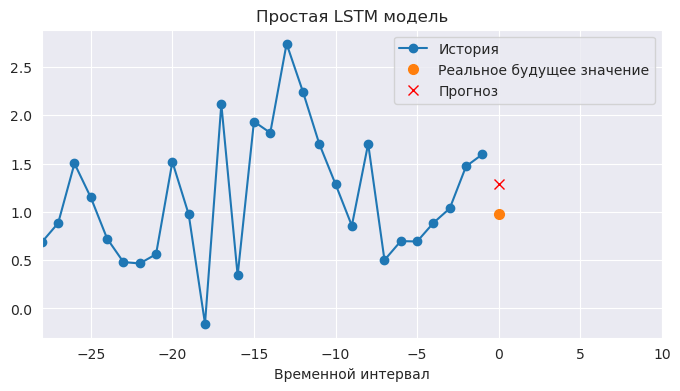

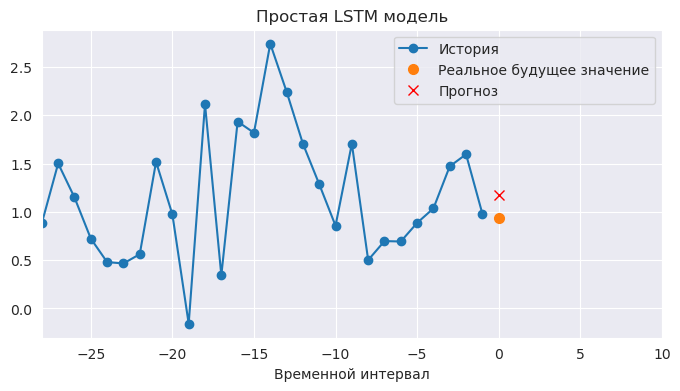

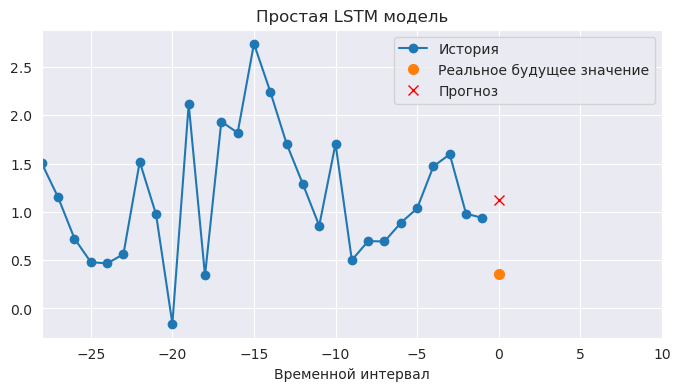

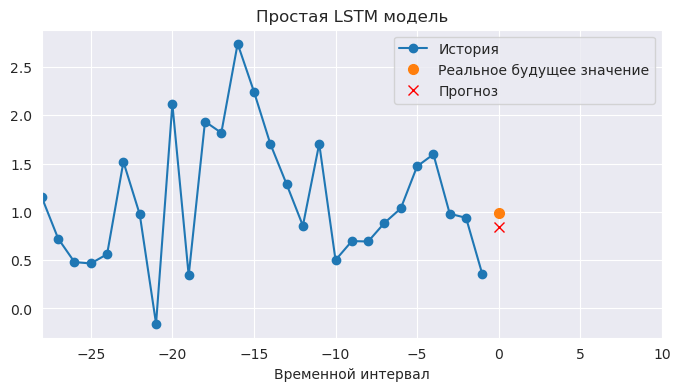

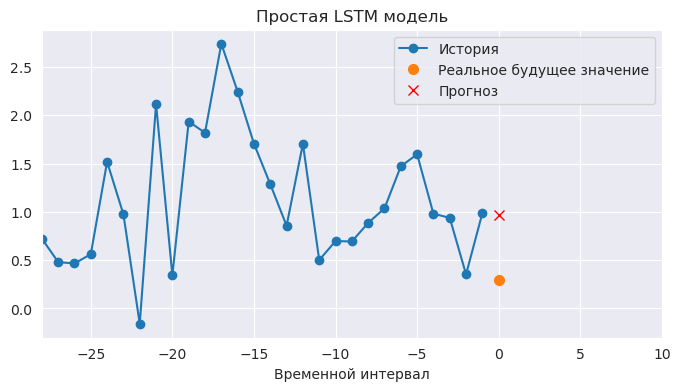

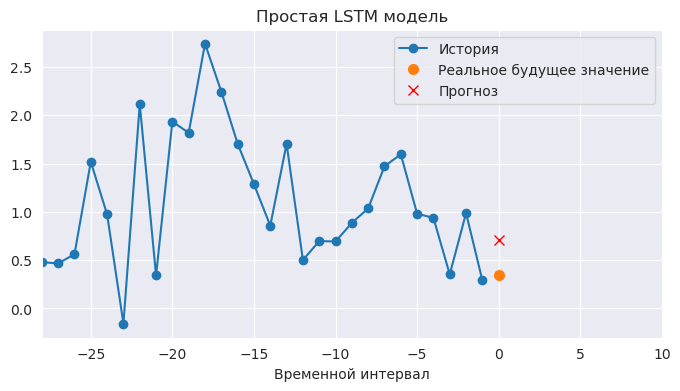

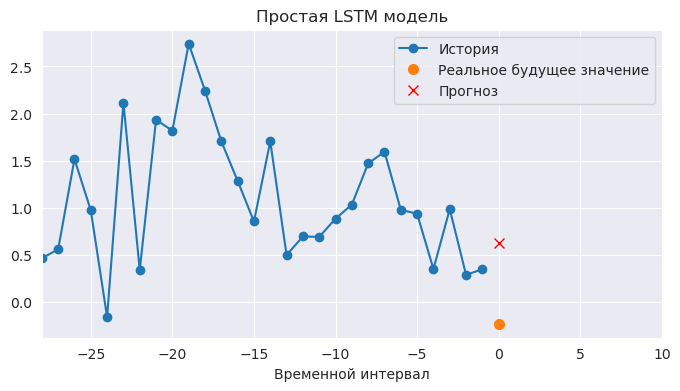

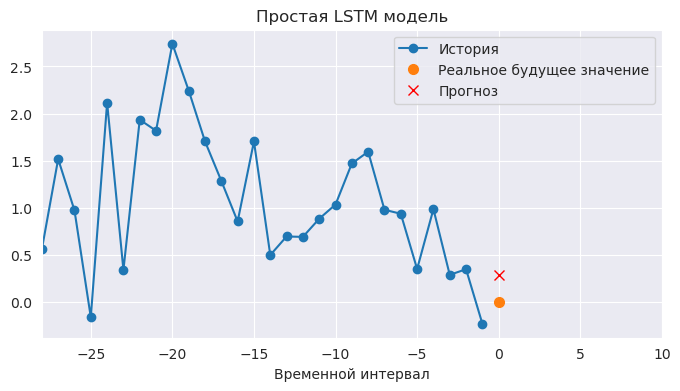

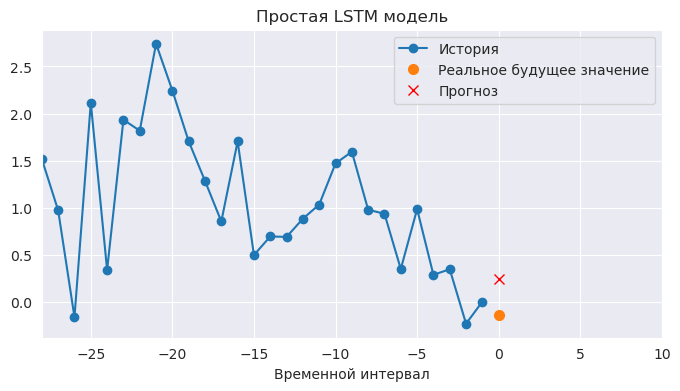

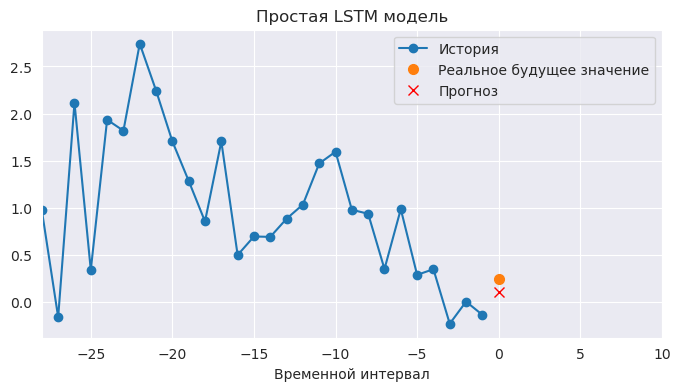

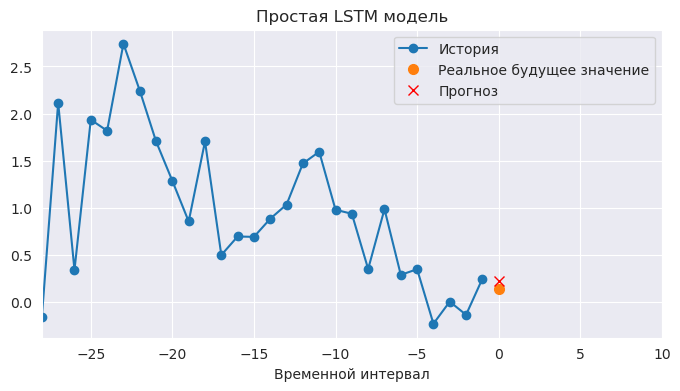

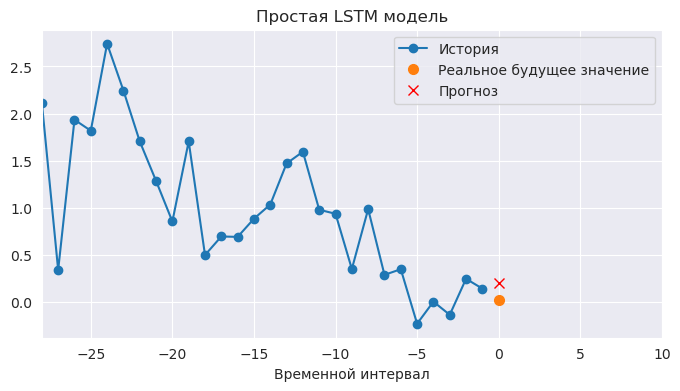

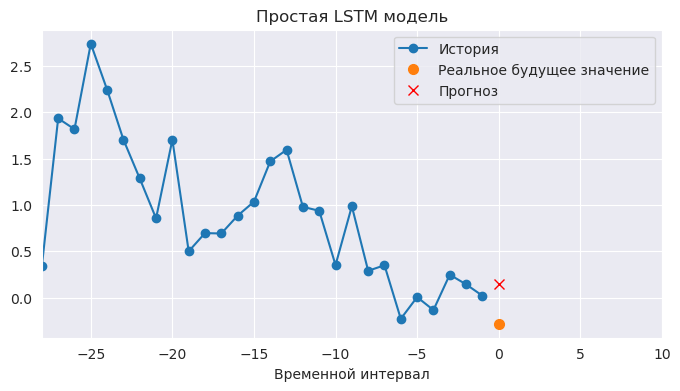

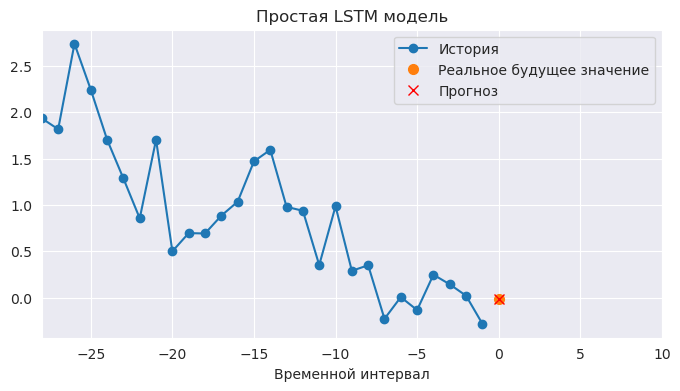

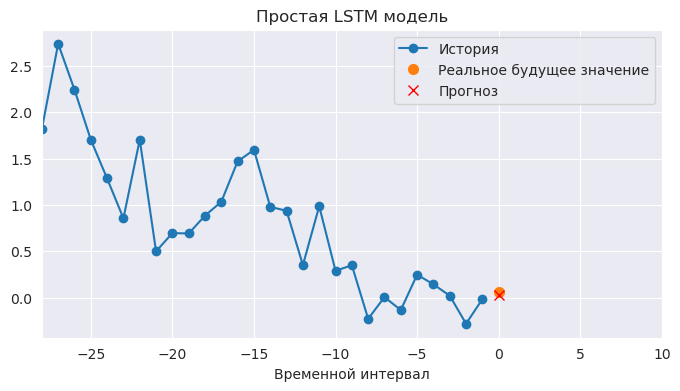

In [47]:
for col in range(y_val.shape[0]):
    show_plot([x_val[col], 
               y_val[col], 
               y_pred_basic[col]], 
               0, 
               'Простая LSTM модель')
plt.show()

In [985]:
# добавляем лаги исходного ряда в качестве признаков
data = df_sales.copy()
data.columns = ["y"]
    
for i in range(1, 3):
    data["lag_{}".format(i)] = data.y.shift(i)

data = data.dropna()
data.head()

,y,lag_1,lag_2
Date,,,
2018-01-21,2566781.0,1997174.0,2029539.4
2018-01-28,2894793.0,2566781.0,1997174.0
2018-02-04,3019153.0,2894793.0,2566781.0
2018-02-11,2808985.0,3019153.0,2894793.0
2018-02-18,2706368.0,2808985.0,3019153.0


In [986]:
uni_data = data.values
print(uni_data.shape)
uni_data[:5]

(259, 3)


array([[2566781. , 1997174. , 2029539.4],
       [2894793. , 2566781. , 1997174. ],
       [3019153. , 2894793. , 2566781. ],
       [2808985. , 3019153. , 2894793. ],
       [2706368. , 2808985. , 3019153. ]])

In [816]:
#from sklearn.preprocessing import MinMaxScaler

#mm = MinMaxScaler()
#uni_data = mm.fit_transform(uni_data)
#print(uni_data.shape)
#uni_data[:5]

In [987]:
n = len(uni_data)

uni_train_mean = uni_data[:int(n*0.8)].mean()
uni_train_std = uni_data[:int(n*0.8)].std()

uni_data = (uni_data - uni_train_mean) / uni_train_std

print(uni_data.shape)
uni_data[:5]

(259, 3)


array([[-1.27705553, -1.81050631, -1.78019533],
       [-0.96986433, -1.27705553, -1.81050631],
       [-0.85339817, -0.96986433, -1.27705553],
       [-1.0502256 , -0.85339817, -0.96986433],
       [-1.14632891, -1.0502256 , -0.85339817]])

In [988]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [989]:
n = len(uni_data)

past_history = 28
future_target = 3
STEP = 1

x_train_single, y_train_single = multivariate_data(uni_data, uni_data[:, 0], 0,
                                                   int(n*0.8), past_history,
                                                   future_target, STEP,
                                                   single_step=True
                                                  )

x_val_single, y_val_single = multivariate_data(uni_data, uni_data[:, 0],
                                               int(n*0.8), None, past_history,
                                               future_target, STEP,
                                               single_step=True
                                              )

x_train_single.shape, y_train_single.shape, x_val_single.shape, y_val_single.shape

((179, 28, 3), (179,), (21, 28, 3), (21,))

In [990]:
print ('История:\n')
print (x_train_single[0])
print ('\nЦель для прогноза:\n')
print (y_train_single[0])

История:

[[-1.27705553 -1.81050631 -1.78019533]
 [-0.96986433 -1.27705553 -1.81050631]
 [-0.85339817 -0.96986433 -1.27705553]
 [-1.0502256  -0.85339817 -0.96986433]
 [-1.14632891 -1.0502256  -0.85339817]
 [-1.51424435 -1.14632891 -1.0502256 ]
 [-1.12835046 -1.51424435 -1.14632891]
 [-1.6322923  -1.12835046 -1.51424435]
 [-1.03246348 -1.6322923  -1.12835046]
 [-0.86327382 -1.03246348 -1.6322923 ]
 [-0.89146882 -0.86327382 -1.03246348]
 [-0.90781585 -0.89146882 -0.86327382]
 [-0.92318421 -0.90781585 -0.89146882]
 [-0.54498293 -0.92318421 -0.90781585]
 [-0.1833291  -0.54498293 -0.92318421]
 [-1.5876613  -0.1833291  -0.54498293]
 [-1.08260687 -1.5876613  -0.1833291 ]
 [-0.06380706 -1.08260687 -1.5876613 ]
 [ 0.22880246 -0.06380706 -1.08260687]
 [-0.04421497  0.22880246 -0.06380706]
 [ 0.24890402 -0.04421497  0.22880246]
 [-0.51185994  0.24890402 -0.04421497]
 [-0.11029612 -0.51185994  0.24890402]
 [ 0.26230849 -0.11029612 -0.51185994]
 [ 0.33722294  0.26230849 -0.11029612]
 [-0.26373532  

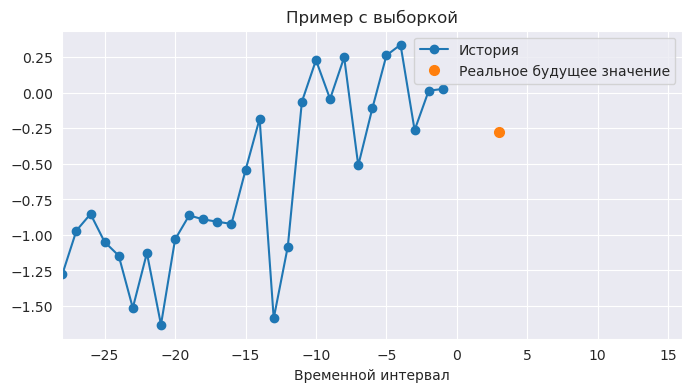

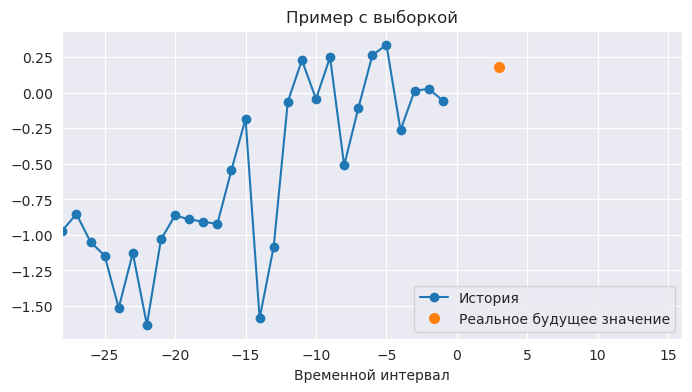

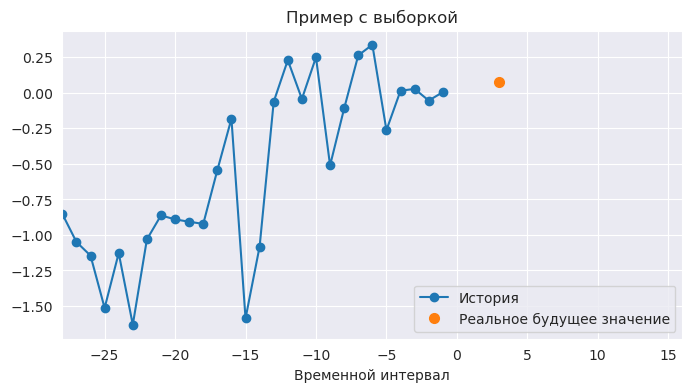

In [991]:
for col in range(3):
    show_plot(
              [x_train_single[col][:,0],
               y_train_single[col]],
               3,
               'Пример с выборкой'
               )
plt.show()

In [992]:
single_step_model = tf.keras.models.Sequential([
    
    tf.keras.layers.LSTM(32,
                         activation='relu',
                         input_shape=x_train_single.shape[-2:]
                        ),
    
    tf.keras.layers.Dense(1)
])

single_step_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss='mean_absolute_error')
single_step_model.summary()

Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_121 (LSTM)             (None, 32)                4608      
                                                                 
 dense_88 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,641
Trainable params: 4,641
Non-trainable params: 0
_________________________________________________________________


In [993]:
single_step_history = single_step_model.fit(x_train_single,
                                            y_train_single,
                                            epochs=16,
                                            validation_data=(x_val_single, y_val_single)
                                           )

Epoch 1/16
6/6 [==============================] - 2s 120ms/step - loss: 0.6827 - val_loss: 1.4504
Epoch 2/16
6/6 [==============================] - 0s 51ms/step - loss: 0.6080 - val_loss: 0.3604
Epoch 3/16
6/6 [==============================] - 1s 71ms/step - loss: 0.5768 - val_loss: 0.3856
Epoch 4/16
6/6 [==============================] - 0s 51ms/step - loss: 0.5518 - val_loss: 0.4952
Epoch 5/16
6/6 [==============================] - 0s 67ms/step - loss: 0.5337 - val_loss: 0.4442
Epoch 6/16
6/6 [==============================] - 0s 56ms/step - loss: 0.5190 - val_loss: 0.4210
Epoch 7/16
6/6 [==============================] - 0s 53ms/step - loss: 0.5189 - val_loss: 0.4068
Epoch 8/16
6/6 [==============================] - 0s 44ms/step - loss: 0.5181 - val_loss: 0.3845
Epoch 9/16
6/6 [==============================] - 0s 38ms/step - loss: 0.4870 - val_loss: 0.3639
Epoch 10/16
6/6 [==============================] - 0s 58ms/step - loss: 0.5137 - val_loss: 0.3583
Epoch 11/16
6/6 [===========

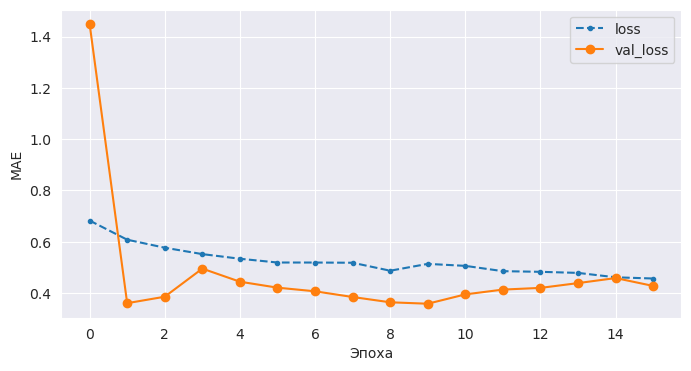

In [994]:
plot_loss(single_step_history)

In [995]:
y_pred_step = single_step_model.predict(x_val_single)

y_pred_step_invers = (y_pred_step * uni_train_std) + uni_train_mean
y_val_single_invers = (y_val_single * uni_train_std) + uni_train_mean
print('MAE', (mean_absolute_error(y_val_single_invers, y_pred_step_invers)).round())

1/1 [==============================] - 0s 208ms/step
MAE 456624.0


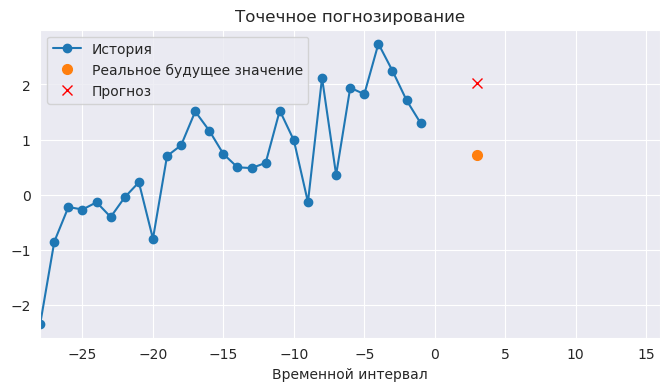

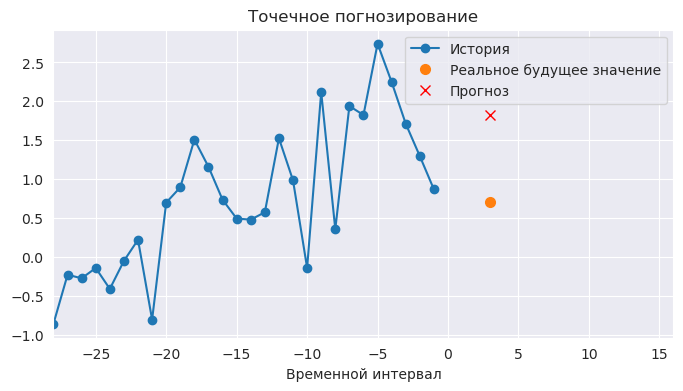

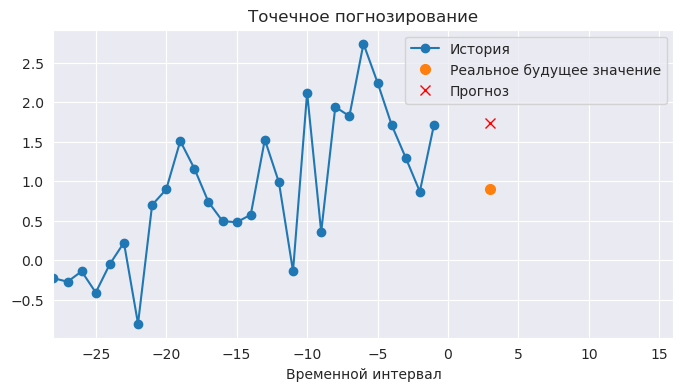

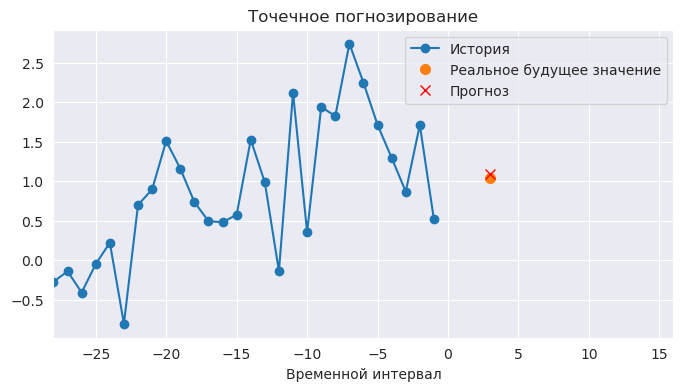

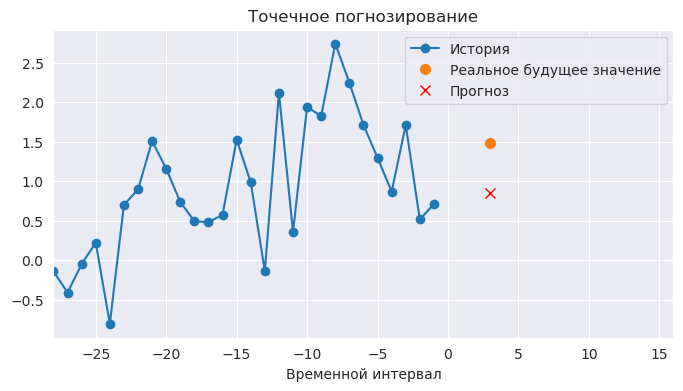

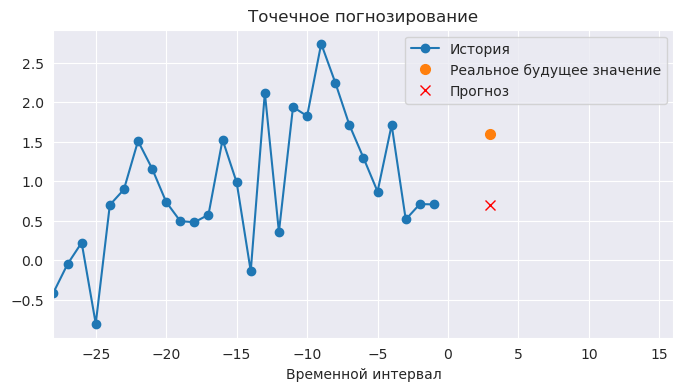

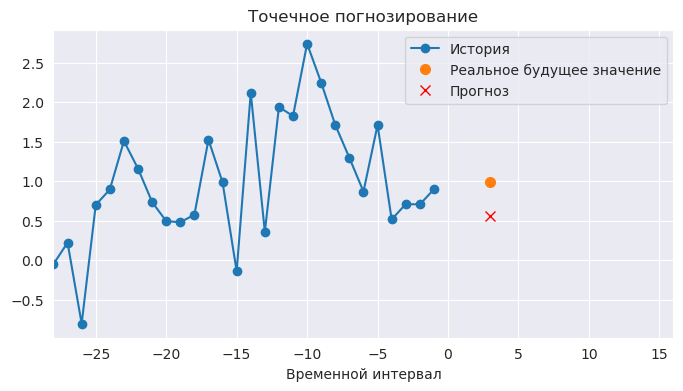

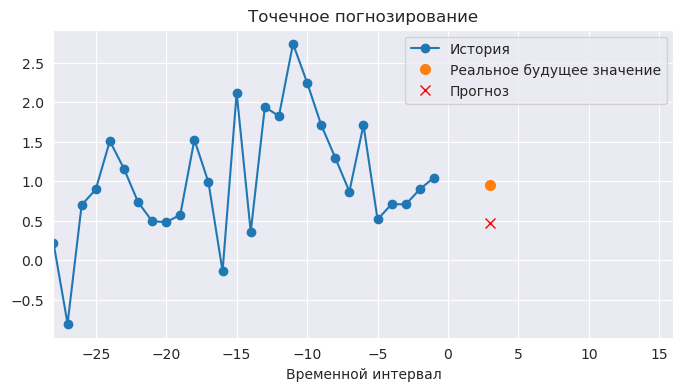

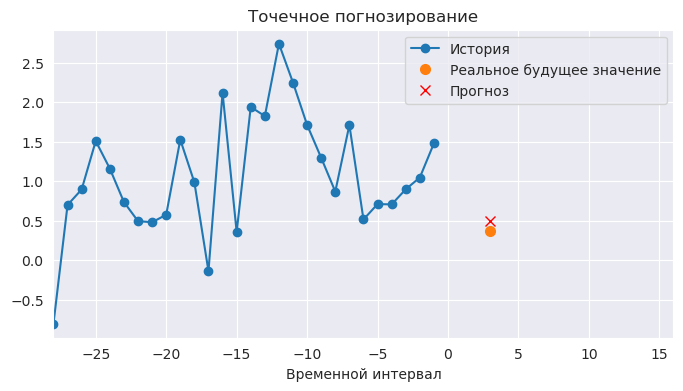

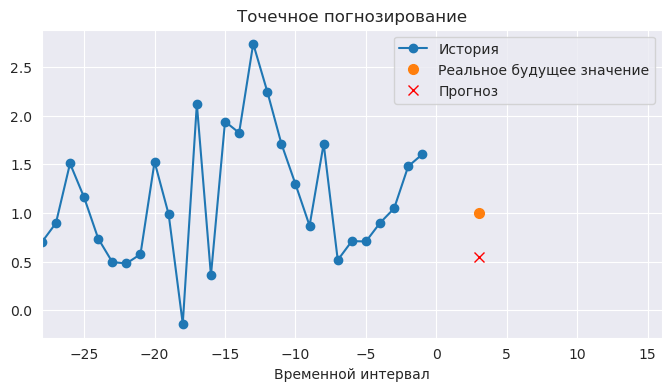

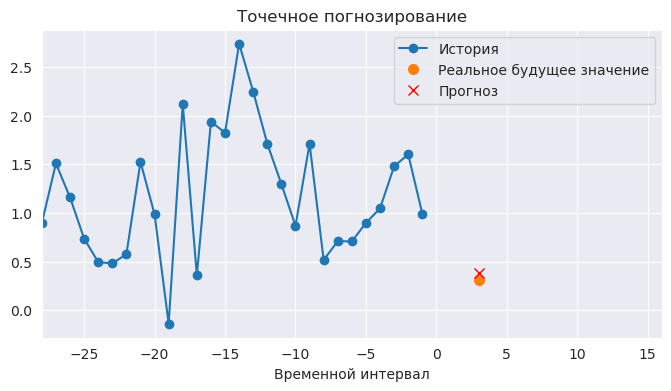

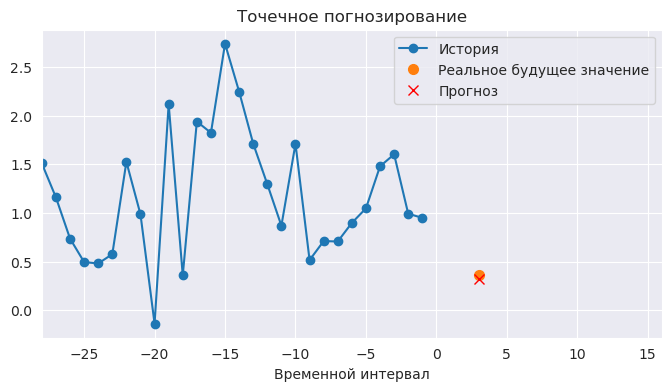

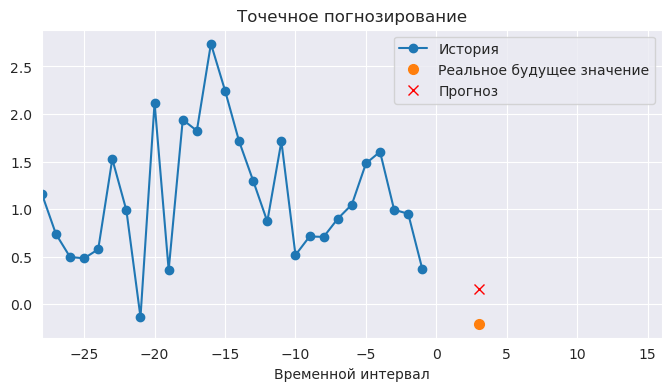

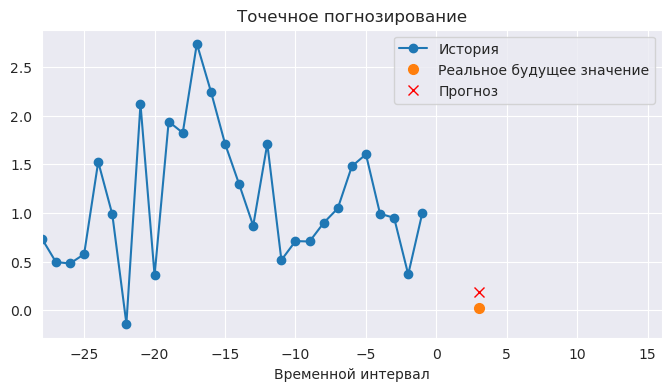

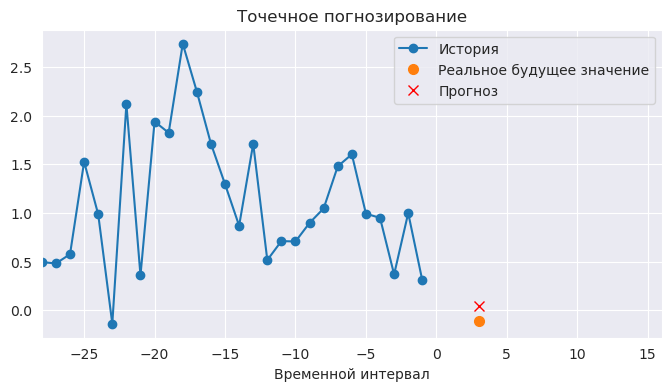

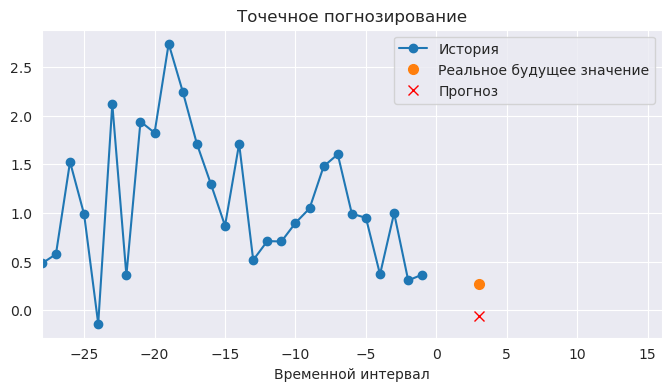

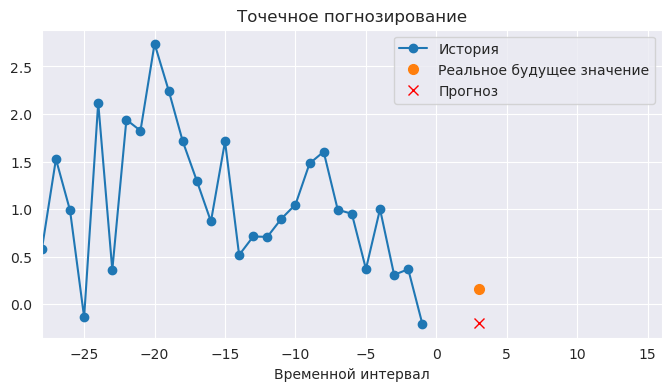

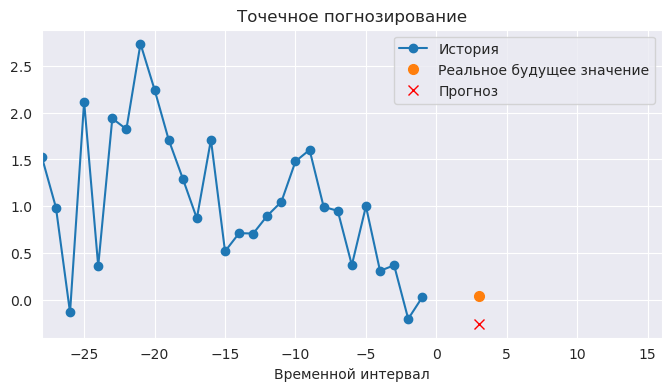

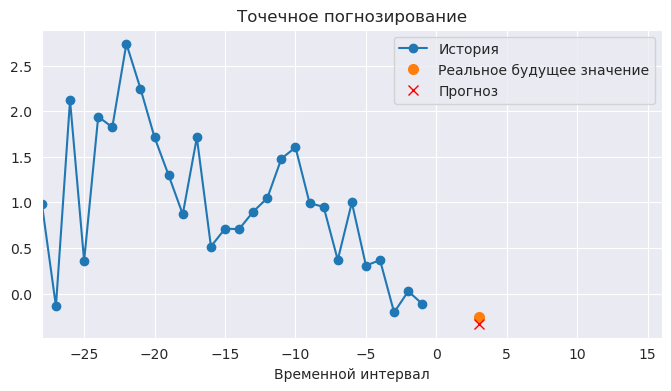

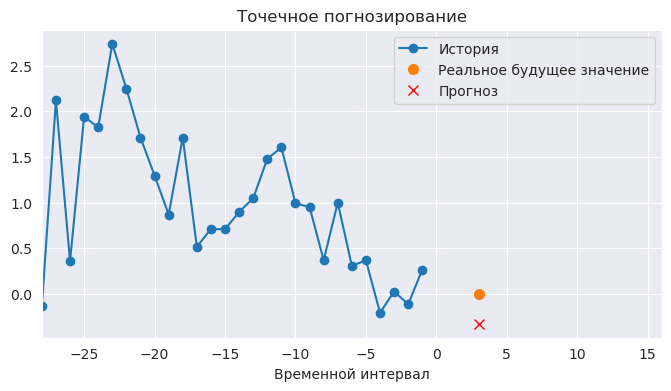

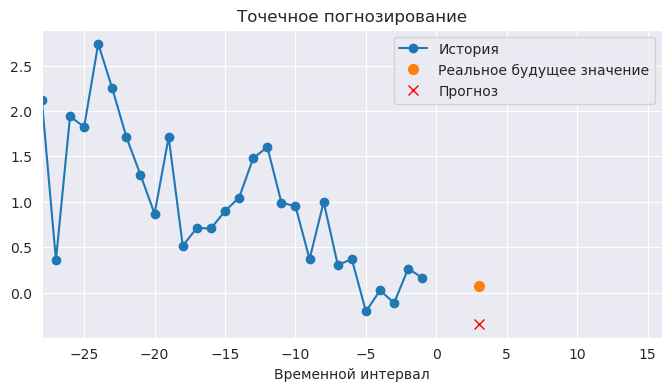

In [996]:
for col in range(y_val_single.shape[0]):
    show_plot([x_val_single[col][:,0], 
               y_val_single[col], 
               y_pred_step[col]], 
               3, 
               'Точечное погнозирование'
             )
plt.show()

In [997]:
# добавляем лаги исходного ряда в качестве признаков
data = df_sales.copy()
data.columns = ["y"]
    
for i in range(1, 3):
    data["lag_{}".format(i)] = data.y.shift(i)

data = data.dropna()
data.head()

,y,lag_1,lag_2
Date,,,
2018-01-21,2566781.0,1997174.0,2029539.4
2018-01-28,2894793.0,2566781.0,1997174.0
2018-02-04,3019153.0,2894793.0,2566781.0
2018-02-11,2808985.0,3019153.0,2894793.0
2018-02-18,2706368.0,2808985.0,3019153.0


In [998]:
uni_data = data.values
print(uni_data.shape)
uni_data[:5]

(259, 3)


array([[2566781. , 1997174. , 2029539.4],
       [2894793. , 2566781. , 1997174. ],
       [3019153. , 2894793. , 2566781. ],
       [2808985. , 3019153. , 2894793. ],
       [2706368. , 2808985. , 3019153. ]])

In [569]:
#from sklearn.preprocessing import MinMaxScaler

#mm = MinMaxScaler()
#uni_data = mm.fit_transform(uni_data)
#print(uni_data.shape)
#uni_data[:5]

(259, 3)


array([[0.21021143, 0.105323  , 0.11128283],
       [0.27061214, 0.21021143, 0.105323  ],
       [0.293512  , 0.27061214, 0.21021143],
       [0.2548113 , 0.293512  , 0.27061214],
       [0.23591523, 0.2548113 , 0.293512  ]])

In [999]:
n = len(uni_data)

uni_train_mean = uni_data[:int(n*0.8)].mean()
uni_train_std = uni_data[:int(n*0.8)].std()

uni_data = (uni_data - uni_train_mean) / uni_train_std

print(uni_data.shape)
uni_data[:5]

(259, 3)


array([[-1.27705553, -1.81050631, -1.78019533],
       [-0.96986433, -1.27705553, -1.81050631],
       [-0.85339817, -0.96986433, -1.27705553],
       [-1.0502256 , -0.85339817, -0.96986433],
       [-1.14632891, -1.0502256 , -0.85339817]])

In [1000]:
n = len(uni_data)

past_history = 28
future_target = 7
STEP = 1

x_train_multi, y_train_multi = multivariate_data(uni_data, uni_data[:, 0], 0,
                                                 int(n*0.8), past_history,
                                                 future_target, STEP
                                                )

x_val_multi, y_val_multi = multivariate_data(uni_data, uni_data[:, 0],
                                             int(n*0.8), None, past_history,
                                             future_target, STEP
                                            )

x_train_multi.shape, y_train_multi.shape, x_val_multi.shape, y_val_multi.shape

((179, 28, 3), (179, 7), (17, 28, 3), (17, 7))

In [1001]:
print ('История:\n')
print (x_train_multi[0])
print ('\nЦель для прогнозирования:\n')
print (y_train_multi[0])

История:

[[-1.27705553 -1.81050631 -1.78019533]
 [-0.96986433 -1.27705553 -1.81050631]
 [-0.85339817 -0.96986433 -1.27705553]
 [-1.0502256  -0.85339817 -0.96986433]
 [-1.14632891 -1.0502256  -0.85339817]
 [-1.51424435 -1.14632891 -1.0502256 ]
 [-1.12835046 -1.51424435 -1.14632891]
 [-1.6322923  -1.12835046 -1.51424435]
 [-1.03246348 -1.6322923  -1.12835046]
 [-0.86327382 -1.03246348 -1.6322923 ]
 [-0.89146882 -0.86327382 -1.03246348]
 [-0.90781585 -0.89146882 -0.86327382]
 [-0.92318421 -0.90781585 -0.89146882]
 [-0.54498293 -0.92318421 -0.90781585]
 [-0.1833291  -0.54498293 -0.92318421]
 [-1.5876613  -0.1833291  -0.54498293]
 [-1.08260687 -1.5876613  -0.1833291 ]
 [-0.06380706 -1.08260687 -1.5876613 ]
 [ 0.22880246 -0.06380706 -1.08260687]
 [-0.04421497  0.22880246 -0.06380706]
 [ 0.24890402 -0.04421497  0.22880246]
 [-0.51185994  0.24890402 -0.04421497]
 [-0.11029612 -0.51185994  0.24890402]
 [ 0.26230849 -0.11029612 -0.51185994]
 [ 0.33722294  0.26230849 -0.11029612]
 [-0.26373532  

In [1002]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(8, 4))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), 'o-', label='История')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'o-', label='Реальные будущие значения')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'o-', color='b', label='Прогноз')
  plt.legend(loc='best')
  plt.show()

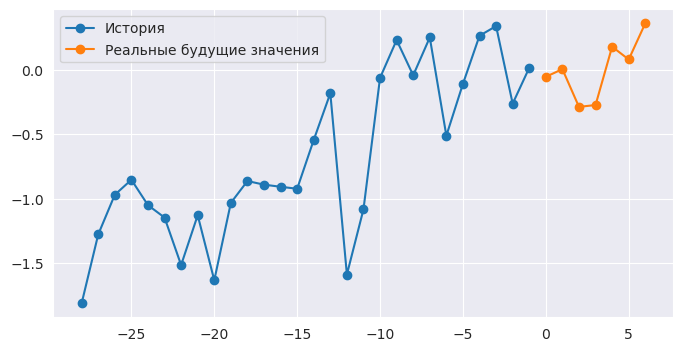

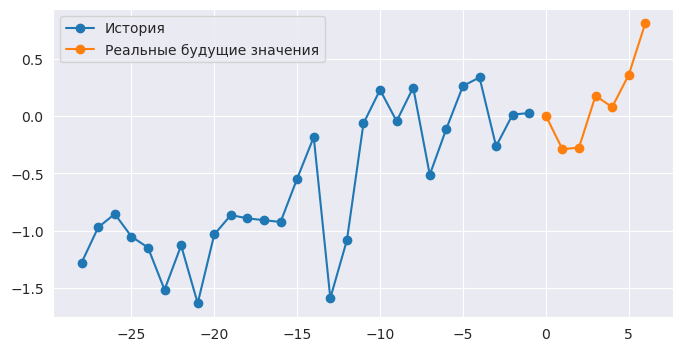

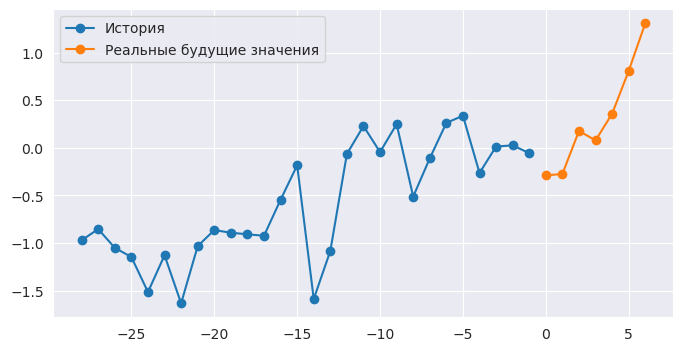

In [1003]:
for col in range(3):
    multi_step_plot(x_train_multi[col], 
                    y_train_multi[col], 
                    np.array([0])
)
plt.show()

In [1004]:
multi_step_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32,  
                         return_sequences=True, 
                         input_shape=x_train_multi.shape[-2:]
                        ),
    
    tf.keras.layers.LSTM(16, 
                         activation='relu'
                        ),
    
    tf.keras.layers.Dense(future_target)
])

multi_step_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
                         loss='mean_absolute_error'
                        )

multi_step_model.summary()

Model: "sequential_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_122 (LSTM)             (None, 28, 32)            4608      
                                                                 
 lstm_123 (LSTM)             (None, 16)                3136      
                                                                 
 dense_89 (Dense)            (None, 7)                 119       
                                                                 
Total params: 7,863
Trainable params: 7,863
Non-trainable params: 0
_________________________________________________________________


In [1005]:
multi_step_history = multi_step_model.fit(x_train_multi,
                                          y_train_multi, 
                                          epochs=16,
                                          validation_data=(x_val_multi, y_val_multi)
                                         )

Epoch 1/16
6/6 [==============================] - 5s 210ms/step - loss: 0.7929 - val_loss: 0.6744
Epoch 2/16
6/6 [==============================] - 1s 77ms/step - loss: 0.7144 - val_loss: 0.4864
Epoch 3/16
6/6 [==============================] - 0s 75ms/step - loss: 0.6111 - val_loss: 0.5573
Epoch 4/16
6/6 [==============================] - 0s 76ms/step - loss: 0.5358 - val_loss: 0.4198
Epoch 5/16
6/6 [==============================] - 1s 107ms/step - loss: 0.4842 - val_loss: 0.4176
Epoch 6/16
6/6 [==============================] - 1s 93ms/step - loss: 0.4581 - val_loss: 0.4421
Epoch 7/16
6/6 [==============================] - 0s 78ms/step - loss: 0.4538 - val_loss: 0.4558
Epoch 8/16
6/6 [==============================] - 0s 78ms/step - loss: 0.4303 - val_loss: 0.4417
Epoch 9/16
6/6 [==============================] - 0s 77ms/step - loss: 0.4238 - val_loss: 0.4925
Epoch 10/16
6/6 [==============================] - 0s 79ms/step - loss: 0.4106 - val_loss: 0.4499
Epoch 11/16
6/6 [==========

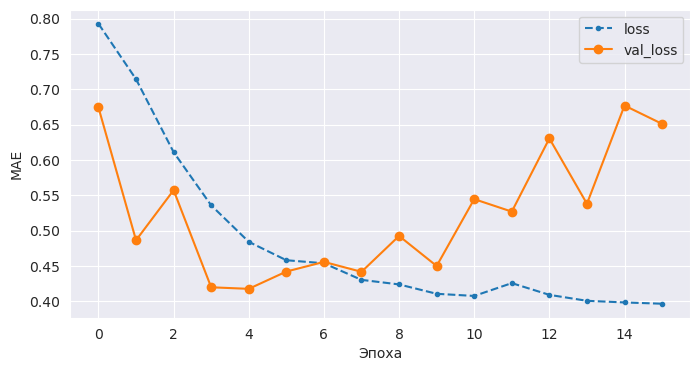

In [1006]:
plot_loss(multi_step_history)

In [1007]:
y_pred_multi = multi_step_model.predict(x_val_multi)

y_pred_multi_invers = (y_pred_multi * uni_train_std) + uni_train_mean
y_val_multi_invers = (y_val_multi * uni_train_std) + uni_train_mean
print('MAE', (mean_absolute_error(y_val_multi_invers, y_pred_multi_invers)).round())

1/1 [==============================] - 1s 638ms/step
MAE 695264.0


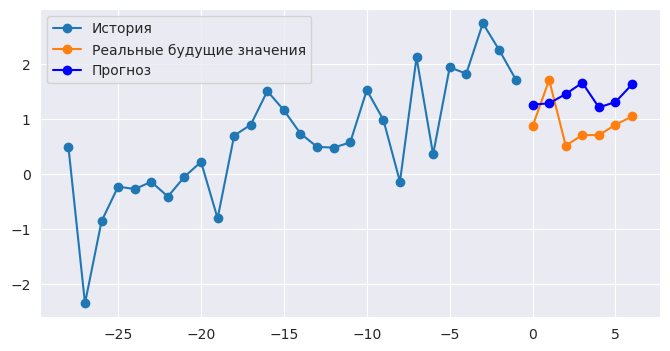

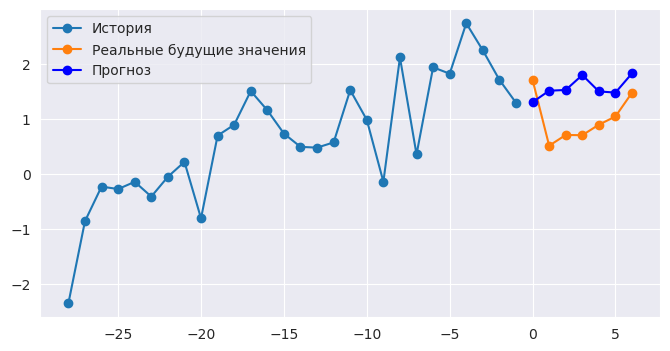

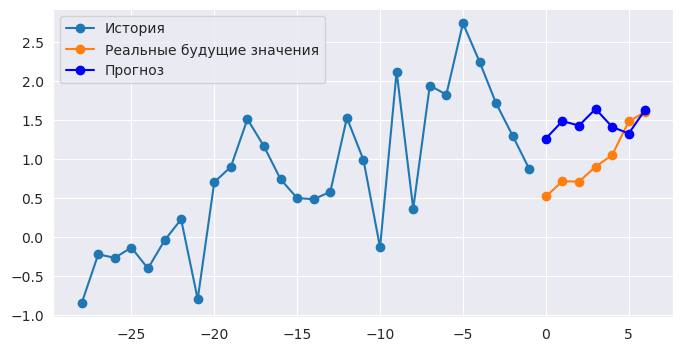

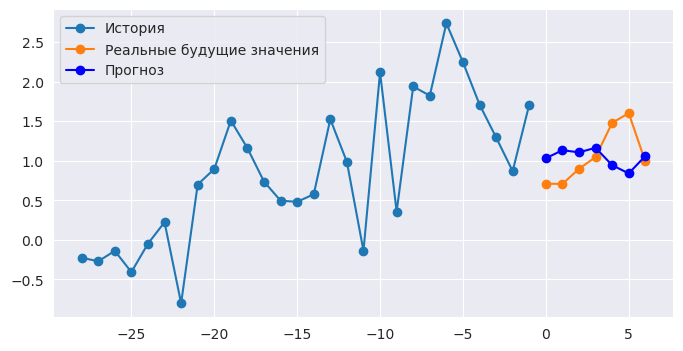

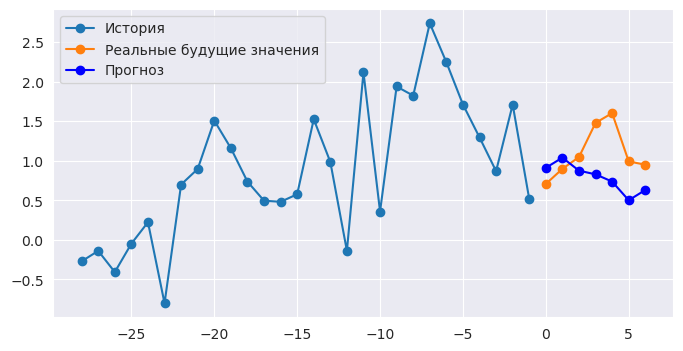

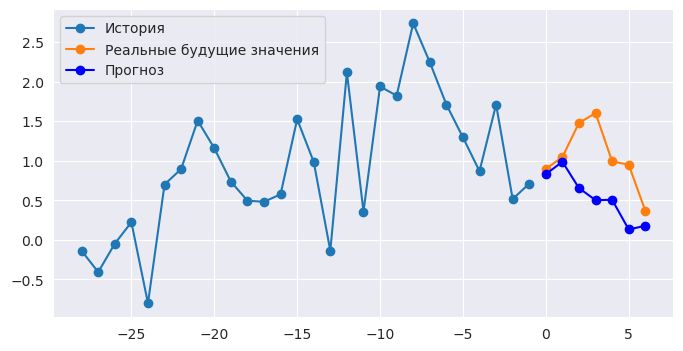

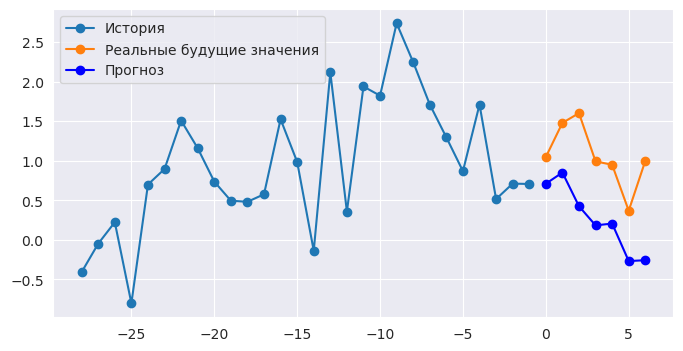

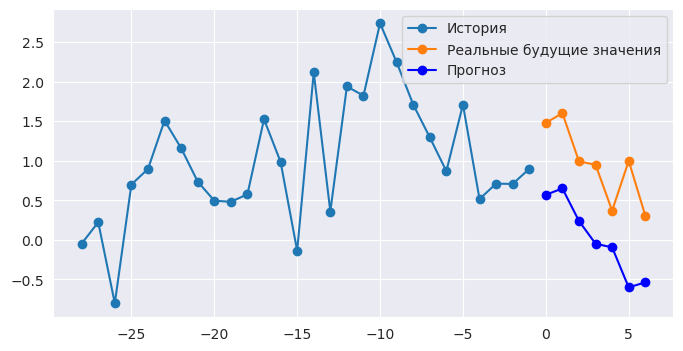

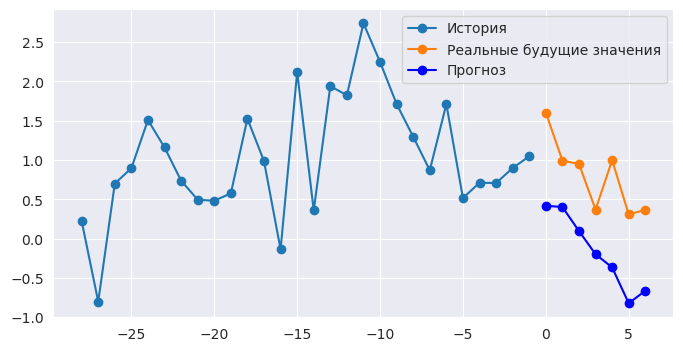

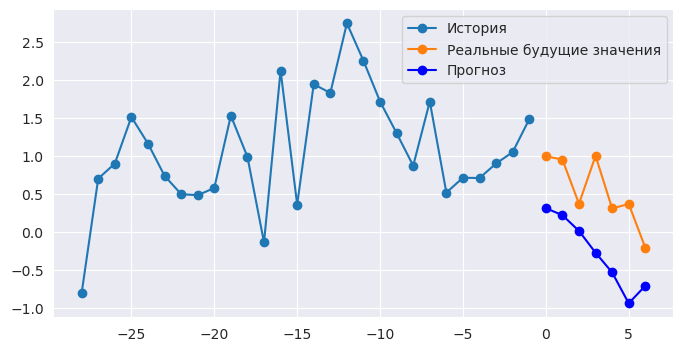

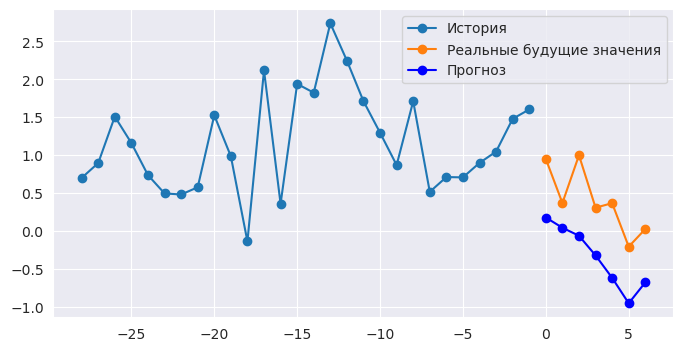

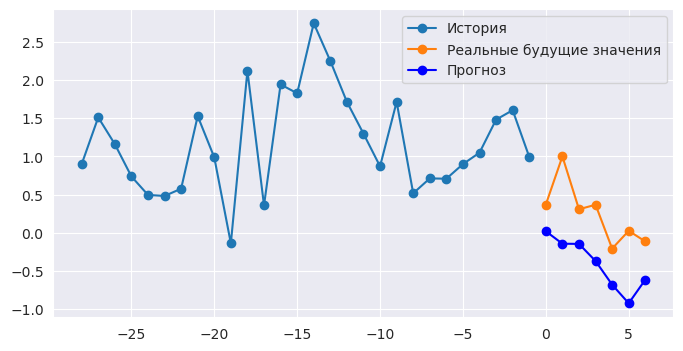

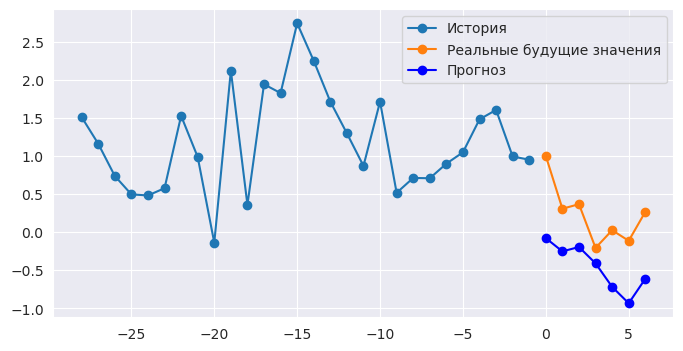

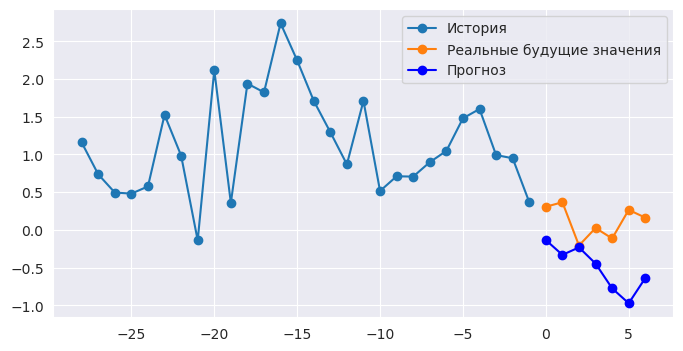

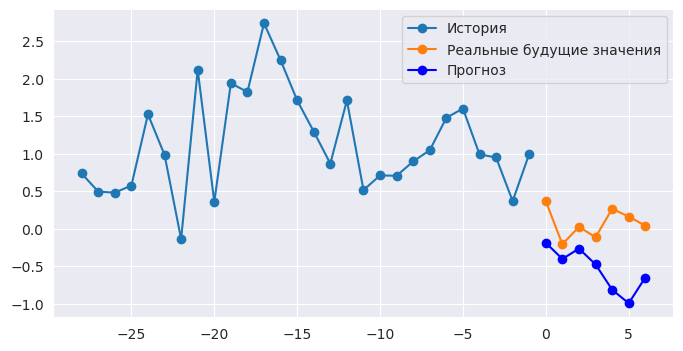

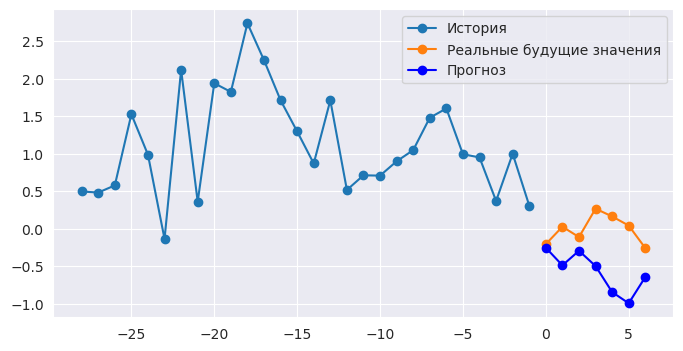

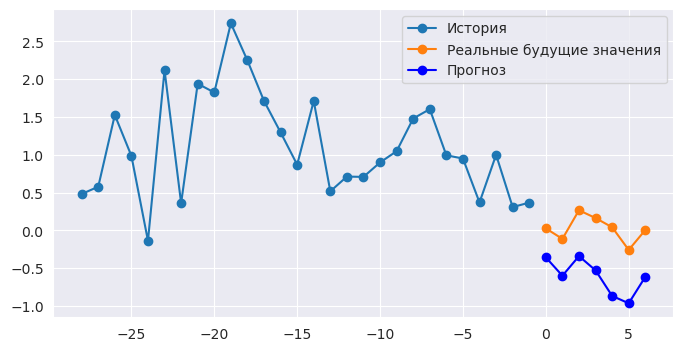

In [1008]:
for col in range(y_val_multi.shape[0]):
    multi_step_plot(x_val_multi[col], 
                    y_val_multi[col], 
                    y_pred_multi[col] 
)
plt.show()